<a href="https://colab.research.google.com/github/myllanes/Introduction-to-Deep-Learning/blob/main/HW1_2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [1/100], Train Loss: 1.8235, Val Loss: 1.7378
Epoch [2/100], Train Loss: 1.3387, Val Loss: 1.3029
Epoch [3/100], Train Loss: 1.0593, Val Loss: 1.0589
Epoch [4/100], Train Loss: 0.8984, Val Loss: 0.9331
Epoch [5/100], Train Loss: 0.8195, Val Loss: 0.8793
Epoch [6/100], Train Loss: 0.7572, Val Loss: 0.8533
Epoch [7/100], Train Loss: 0.7330, Val Loss: 0.8432
Epoch [8/100], Train Loss: 0.7081, Val Loss: 0.8385
Epoch [9/100], Train Loss: 0.7049, Val Loss: 0.8338
Epoch [10/100], Train Loss: 0.6977, Val Loss: 0.8314
Epoch [11/100], Train Loss: 0.6992, Val Loss: 0.8332
Epoch [12/100], Train Loss: 0.6908, Val Loss: 0.8292
Epoch [13/100], Train Loss: 0.6899, Val Loss: 0.8258
Epoch [14/100], Train Loss: 0.6769, Val Loss: 0.8221
Epoch [15/100], Train Loss: 0.6698, Val Loss: 0.8238
Epoch [16/100], Train Loss: 0.6740, Val Loss: 0.8248
Epoch [17/100], Train Loss: 0.6779, Val Loss: 0.8272
Epoch [18/100], Train Loss: 0.6748, Val Loss: 0.8279
Epoch [19/100], Train Loss: 0.6732, Val Loss: 0.8262
Ep

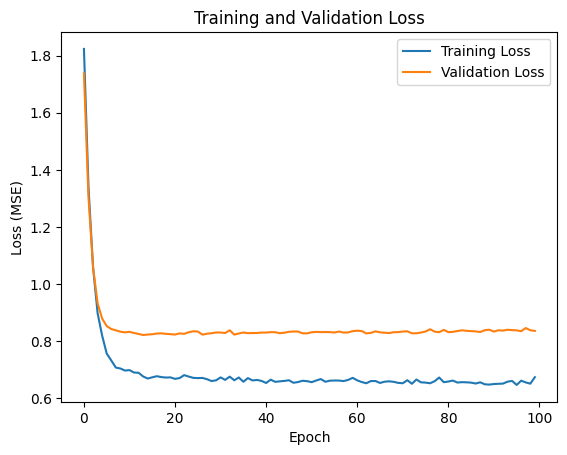

Final Training RMSE: 0.8213
Final Validation RMSE: 0.9146
Model Complexity: 321 parameters


In [5]:
#Michael Yllanes
#1a
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Load data
df_train = pd.read_csv('https://raw.githubusercontent.com/myllanes/Introduction-to-Deep-Learning/refs/heads/main/Housing.csv', na_values='*')

# features
usefull_cols = ['bedrooms', 'bathrooms', 'stories']
df_train_prepro = df_train[usefull_cols].copy()

# Handle missing values
df_train_prepro = df_train_prepro.fillna(df_train_prepro.mean())

# Target variable
target = df_train['parking']

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(df_train_prepro, target, test_size=0.2, random_state=42) #80/20

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Hyperparameters
input_size = X_train_scaled.shape[1]  # features
hidden_size = 64  # neurons in the hidden layer
output_size = 1 # Regression output (house price)
learning_rate = 0.001 # learning rate
num_epochs = 100 #epochs

# Initialize model, loss, and optimizer
model = MLP(input_size, hidden_size, output_size)
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training and validation loop
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss / len(train_loader))

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')

# Plot training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Final accuracy
final_train_rmse = np.sqrt(train_losses[-1])
final_val_rmse = np.sqrt(val_losses[-1])
print(f'Final Training RMSE: {final_train_rmse:.4f}')
print(f'Final Validation RMSE: {final_val_rmse:.4f}')

# Model complexity
total_params = sum(p.numel() for p in model.parameters())
print(f'Model Complexity: {total_params} parameters')